# Script per analizzare uno specifico mese

Questo script consente di ottenere i grafici e le informazioni principali relativi ad un determinato mese.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

Per far funzionare il presente script è necessario seguire i 3 step seguenti:

1) Assegnare alla variabile `month` il mese che si vuole analizzare nel formato 'yyyy/mm'

In [2]:
month = '2023/11'

2. Scaricare dal <a href='https://terremoti.ov.ingv.it/gossip/flegrei/index.html'>link al sito INGV</a> il csv aggiornato da rinominare 'events_2023_updated.csv' ed da inserire nella stessa cartella dello script

In [3]:
df_2023 = pd.read_csv('events_2023_updated.csv')   # import il dataframe aggiornato all'ultimo mese

3. Eseguire tutte le celle sotto (usando il comando "run all above")

In [4]:
# import dati anni 2022
df_2022 = pd.read_csv('events 2022.csv')

#creo df
df = pd.concat([df_2022,df_2023])
df = df.reset_index()
df = df.drop('index', axis=1)
df = df.drop(['#EventID','MagType','MagErr', 'Area', 'Type', 'Level'], axis=1)

# convertion data type
df['Time'] = df['Time'].str.replace('-','/')
df['Time'] = pd.to_datetime(df['Time'],format='mixed')

# create new columns
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month

# convertion data type
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

# create new columns
df['year_month']= pd.to_datetime(df.Time).dt.strftime('%Y/%m')
df['date']= pd.to_datetime(df.Time).dt.strftime('%Y/%m/%d')

In [5]:
# creo una variabile che mi servirà per filtrare gli ultimi 12 mesi
month_LTM = month

In [6]:
#creo il filtro in base al mese selezionato
list_year_month = list(df['year_month'].unique())   # lista da utilizzare per filtrare il mese da analizzare
month_index = list_year_month.index(month)          # indice del mese selezionato nella lista suddetta, tale variabile verrà utilizzata come "filtro"

In [7]:
# realizzo una mappa satellitare con la localizzazione di ogni terremoto
# relativi all'ultimo mese di calendario disponibile
# la grandezza di ogni punto indica la magnitudo, 
# mentre la scala di colore indica la profondità

color_scale = [(0, 'yellow'), (1,'red')]

fig = px.scatter_mapbox(df[(df['year_month']==list_year_month[month_index])&(df['Magnitude']>=0)],
                        hover_name='Time', 
                        lat='Latitude', 
                        lon='Longitude',
                        color='Depth/km',
                        color_continuous_scale=color_scale,
                        size='Magnitude',
                        zoom=11, 
                        height=500,
                        width=800
                        )

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

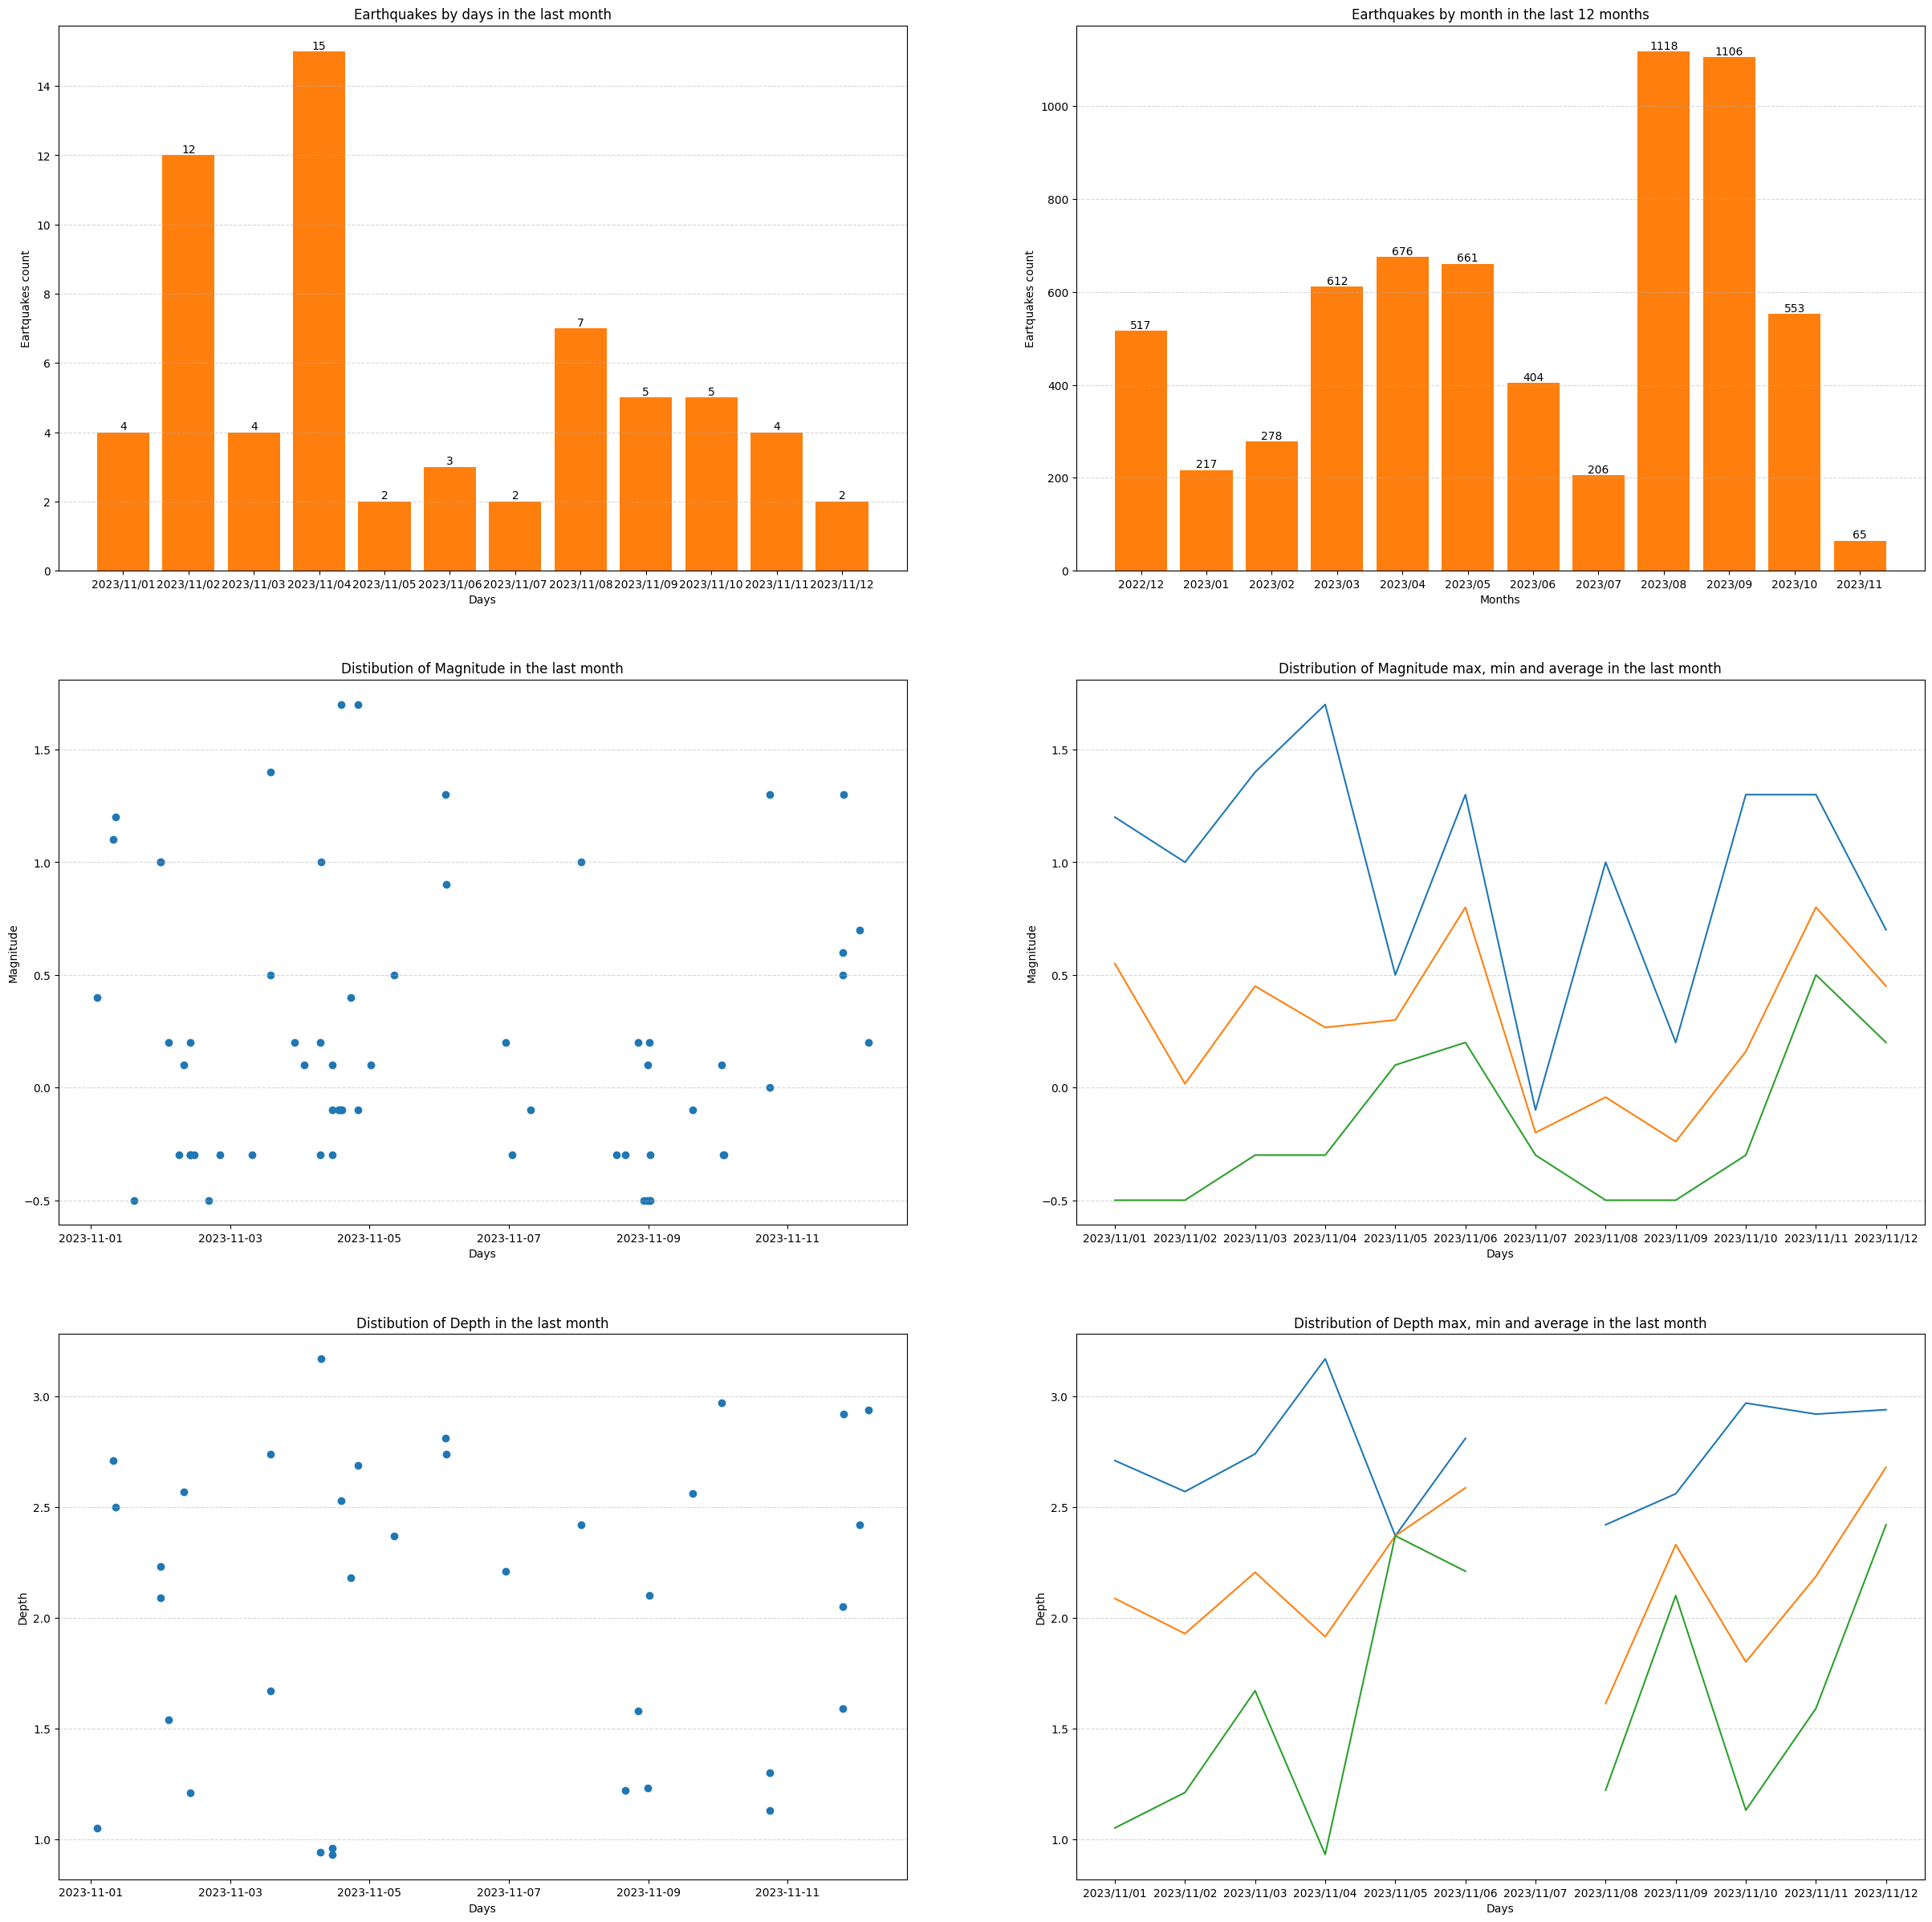

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))

x = df[df['year_month']==list_year_month[month_index]].groupby('date')['Time'].count().reset_index()['date']
y = df[df['year_month']==list_year_month[month_index]].groupby('date')['Time'].count().reset_index()['Time']
axs[0,0].bar(x,y)
axs[0,0].set_title("Earthquakes by days in the last month")
axs[0,0].set_xlabel("Days")
axs[0,0].set_ylabel("Eartquakes count")
axs[0,0].grid(axis='y', alpha=0.5, linestyle='--')
bar_container = axs[0,0].bar(x, y)
axs[0,0].bar_label(bar_container, label_type='edge')

data_LTM = df.groupby('year_month')['Time'].count().reset_index()
data_LTM = data_LTM.loc[data_LTM.index.isin(list(np.arange(0,data_LTM[data_LTM.year_month == month_LTM].index[0]+1,1)))]
x = data_LTM.tail(12)['year_month']
y = data_LTM.tail(12)['Time']
axs[0,1].bar(x,y)
axs[0,1].set_title("Earthquakes by month in the last 12 months")
axs[0,1].set_xlabel("Months")
axs[0,1].set_ylabel("Eartquakes count")
axs[0,1].grid(axis='y', alpha=0.5, linestyle='--')
bar_container = axs[0,1].bar(x, y)
axs[0,1].bar_label(bar_container, label_type='edge')


data = df[(~df['Magnitude'].isnull())&(df['year_month']==list_year_month[month_index])][['Magnitude','year_month','Time']]
axs[1,0].scatter(data.Time, data.Magnitude)
axs[1,0].set_title("Distibution of Magnitude in the last month")
axs[1,0].set_xlabel("Days")
axs[1,0].set_ylabel("Magnitude")
axs[1,0].grid(axis='y', alpha=0.5, linestyle='--')


data = df[(~df['Magnitude'].isnull())&(df['year_month']==list_year_month[month_index])][['Magnitude','date','Time']]
data_max = data.groupby('date')['Magnitude'].max().reset_index()
data_avg = data.groupby('date')['Magnitude'].mean().reset_index()
data_min = data.groupby('date')['Magnitude'].min().reset_index()
axs[1,1].plot(data_max.date, data_max['Magnitude'])
axs[1,1].plot(data_avg.date, data_avg['Magnitude'])
axs[1,1].plot(data_min.date, data_min['Magnitude'])
axs[1,1].set_title("Distribution of Magnitude max, min and average in the last month")
axs[1,1].set_xlabel("Days")
axs[1,1].set_ylabel("Magnitude")
axs[1,1].grid(axis='y', alpha=0.5, linestyle='--')


data = df[(~df['Magnitude'].isnull())&(df['year_month']==list_year_month[month_index])][['Depth/km','year_month','Time']]
axs[2,0].scatter(data.Time, data['Depth/km'])
axs[2,0].set_title("Distibution of Depth in the last month")
axs[2,0].set_xlabel("Days")
axs[2,0].set_ylabel("Depth")
axs[2,0].grid(axis='y', alpha=0.5, linestyle='--')


data = df[(~df['Magnitude'].isnull())&(df['year_month']==list_year_month[month_index])][['Depth/km','date','Time']]
#data['Depth/km'] = data['Depth/km'].fillna(0)
data_max = data.groupby('date')['Depth/km'].max().reset_index()
data_avg = data.groupby('date')['Depth/km'].mean().reset_index()
data_min = data.groupby('date')['Depth/km'].min().reset_index()
axs[2,1].plot(data_max.date, data_max['Depth/km'])
axs[2,1].plot(data_avg.date, data_avg['Depth/km'])
axs[2,1].plot(data_min.date, data_min['Depth/km'])
axs[2,1].set_title("Distribution of Depth max, min and average in the last month")
axs[2,1].set_xlabel("Days")
axs[2,1].set_ylabel("Depth")
axs[2,1].grid(axis='y', alpha=0.5, linestyle='--')


Totale terremoti nel mese e Totale terremoti negli ultimi 12 mesi

In [9]:
print('Totale terremoti nel mese: ', df[df['year_month']==list_year_month[month_index]].groupby('date')['Time'].count().reset_index()['Time'].sum())
print('Totale terremoti negli ultimi 12 mesi: ', data_LTM.tail(12)['Time'].sum())

Totale terremoti nel mese:  65
Totale terremoti negli ultimi 12 mesi:  6413


Describe Terremoti giornalieri nel mese e Describe Terremoti mensile negli ultimi 12 mesi

In [10]:
df_mese = df[df['year_month']==list_year_month[month_index]].groupby('date')['Time'].count().reset_index()['Time'].describe().reset_index()
df_mese = df_mese.rename(columns={"Time": "Terremoti nel mese"})
df_12_mesi = data_LTM.tail(12).describe().reset_index()
df_12_mesi = df_12_mesi.rename(columns={"Time": "Terremoti ultimi 12 mesi"})

df_terremoti = pd.concat([df_mese,df_12_mesi[df_12_mesi.columns[1]]], join='inner',axis=1)
df_terremoti

,index,Terremoti nel mese,Terremoti ultimi 12 mesi
0,count,12.000000,12.000000
1,mean,5.416667,534.416667
2,std,4.100074,333.266876
3,min,2.000000,65.000000
4,25%,2.750000,262.750000
5,50%,4.000000,535.000000
6,75%,5.500000,664.750000
7,max,15.000000,1118.000000


Describe magnituo e profondità nel mese

In [11]:
df[(~df['Magnitude'].isnull())&(df['year_month']==list_year_month[month_index])][['Depth/km','Magnitude']].describe()

,Depth/km,Magnitude
count,35.000000,64.000000
mean,2.064857,0.209375
std,0.695005,0.600190
min,0.930000,-0.500000
25%,1.420000,-0.300000
50%,2.210000,0.100000
75%,2.630000,0.500000
max,3.170000,1.700000
